# Questão 1 - Prova 2 de Inteligência Artificial
# Lucas Nóbrega e Nathália de Vasconcelos

# 1. Pré-processamento de dados

### Importando as bibliotecas necessárias, bem como o dataset da questão. 

In [3]:
import scipy.io.arff as io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Read arff data
with open("Autism-Adult-Data.arff") as f:
    values = io.loadarff(f)
    f.close()

# Dataset em formato DataFrame para manipulá-lo usando a biblioteca pandas
dataset = pd.DataFrame(data=values[0])

# Entradas e saída do dataset
X = dataset.iloc[:, [10,11,12,13,14,17,20]].values
y = dataset.iloc[:, 20].values

# Colunas específicas
age = dataset.iloc[:, 10].values
gender = dataset.iloc[:, 11].values
ethnicity = dataset.iloc[:, 12].values
jaundice = dataset.iloc[:, 13].values
austim = dataset.iloc[:, 14].values
result = dataset.iloc[:, 17].values
classASD = dataset.iloc[:, 20].values

### Dados estão faltando na coluna ethnicity, logo, precisam ser substituídos por NaN e em seguida a Moda é calculada. Após o seu cálculo, os dados que constarem como NaN serão trocados pela Moda.

In [4]:
dataset['ethnicity'] = dataset['ethnicity'].replace(b'?', np.nan)

In [5]:
dataset.ethnicity.mode()

0    b'White-European'
dtype: object

In [6]:
dataset['ethnicity'] = dataset['ethnicity'].replace(np.nan, b'White-European')

### O mesmo vale para a coluna relation.

In [7]:
dataset.relation.mode()

0    b'Self'
dtype: object

In [8]:
dataset['relation'] = dataset['relation'].replace(b'?', b'Self')

### Configurando a tabela do dataset para aparecer completamente quando um print() for utilizado.

In [9]:
print(pd.options.display.max_columns, pd.options.display.max_rows)
pd.options.display.max_columns = 22
pd.options.display.max_rows = 703

20 60


### Ao plotar os dados dos nossos atributos numéricos, percebemos que a idade 383.0 é um outlier. Precisamos tratar isto.

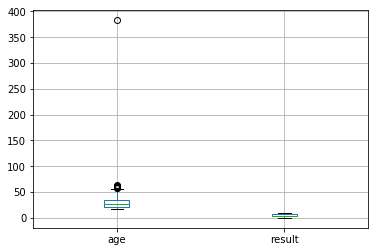

In [10]:
dataset.boxplot()

### Alguns detalhes do atributo age e result. Na coluna 'age', percebe-se que existem dois dados faltando. Além disso, a idade 383.0 foi considerada absurda. Com base nisto, precisamos remover esse outlier e substituí-lo pela mediana das idades existentes.

In [11]:
dataset.describe()

,age,result
count,702.000000,704.000000
mean,29.698006,4.875000
std,16.507465,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


### Localizando a instância que possui o outlier...

In [12]:
dataset.loc[dataset['age'] == 383.00]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',383.0,b'f',b'Pasifika',b'no',b'no',"b""'New Zealand'""",b'no',1.0,"b""'18 and more'""",b'Self',b'NO'


### Tratando as instâncias de age vazias...

In [13]:
dataset['age'] = dataset['age'].replace(b'n', b'?')

In [14]:
aux = np.array(dataset['age'])

### Substituindo o outlier pela mediana da age, ignorando as instâncias ainda vazias...

In [15]:
dataset['age'] = dataset['age'].replace(383, np.nanmedian(aux))

In [16]:
dataset.describe()

,age,result
count,702.000000,704.000000
mean,29.190883,4.875000
std,9.704950,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,64.000000,10.000000


### Encontrando as instâncias vazias e substituindo-as pela mediana depois que o outlier foi tratado. 

In [17]:
dataset['age'] = dataset['age'].replace(np.nan, np.nanmedian(aux))

### Novo boxplot dos atributos age e result. Perceba que agora não temos mais a presença do far outlier.

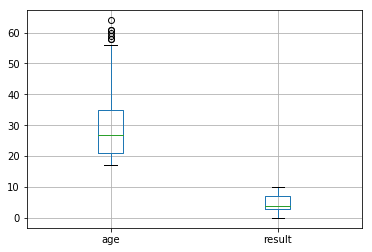

In [18]:
dataset.boxplot()

### Plotando histogramas das colunas age e result...

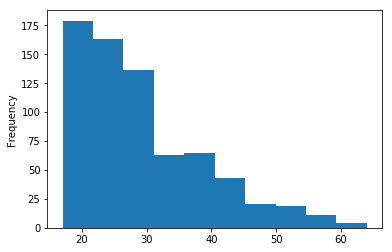

In [19]:
dataset['age'].plot(kind='hist')

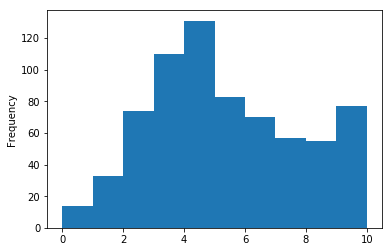

In [20]:
dataset['result'].plot(kind='hist')

### Checando se ainda existe alguma instância com atributos vazios no dataset. 

In [21]:
dataset.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

### Substituindo as interrogações por nan a fim de que o método isnull() possa realmente checar se existe algum dado faltando no dataset...

In [22]:
dataset.replace(b'?', np.nan)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,b'f',b'White-European',b'no',b'no',"b""'United States'""",b'no',6.0,"b""'18 and more'""",b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,"b""'18 and more'""",b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,"b""'18 and more'""",b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35.0,b'f',b'White-European',b'no',b'yes',"b""'United States'""",b'no',6.0,"b""'18 and more'""",b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',40.0,b'f',b'White-European',b'no',b'no',b'Egypt',b'no',2.0,"b""'18 and more'""",b'Self',b'NO'
5,b'1',b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',36.0,b'm',b'Others',b'yes',b'no',"b""'United States'""",b'no',9.0,"b""'18 and more'""",b'Self',b'YES'
6,b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',17.0,b'f',b'Black',b'no',b'no',"b""'United States'""",b'no',2.0,"b""'18 and more'""",b'Self',b'NO'
7,b'1',b'1',b'1',b'1',b'0',b'0',b'0',b'0',b'1',b'0',64.0,b'm',b'White-European',b'no',b'no',"b""'New Zealand'""",b'no',5.0,"b""'18 and more'""",b'Parent',b'NO'
8,b'1',b'1',b'0',b'0',b'1',b'0',b'0',b'1',b'1',b'1',29.0,b'm',b'White-European',b'no',b'no',"b""'United States'""",b'no',6.0,"b""'18 and more'""",b'Self',b'NO'
9,b'1',b'1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'0',17.0,b'm',b'Asian',b'yes',b'yes',b'Bahamas',b'no',8.0,"b""'18 and more'""","b""'Health care professional'""",b'YES'


### Pronto!!! Não temos mais dados incompletos. Só felicidade!

In [23]:
dataset.isnull().values.any()

False

In [24]:
dataset.describe()

,age,result
count,704.000000,704.000000
mean,29.184659,4.875000
std,9.691837,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,64.000000,10.000000


### Convertendo os scores de strings para valores numéricos...

In [25]:
colunms_score = [('A'+str(i)+"_Score") for i in range(1,11)]
print(colunms_score)

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


In [26]:
dataset[colunms_score] = dataset[colunms_score].apply(pd.to_numeric)

### Transformando os dados do atributo gênero...

In [27]:
gender = LabelEncoder().fit_transform(gender)
dataset['gender'] = gender

### Transformando os dados do atributo jaundice...

In [28]:
jaundice = LabelEncoder().fit_transform(jaundice)
dataset['jundice'] = jaundice

### Transformando os dados do atributo austim...

In [29]:
austim = LabelEncoder().fit_transform(austim)
dataset['austim'] = austim

### Transformando os dados do atributo ethnicity...

In [30]:
ethnicity = LabelEncoder().fit_transform(ethnicity)
dataset['ethnicity'] = ethnicity

### Transformando a Class/ASD...

In [31]:
classASD = LabelEncoder().fit_transform(classASD)
dataset['Class/ASD'] = classASD

### Balanceando as classes...

In [32]:
dataset['Class/ASD'].value_counts()

0    515
1    189
Name: Class/ASD, dtype: int64

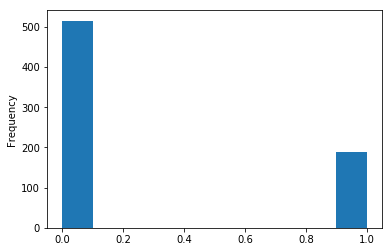

In [33]:
dataset['Class/ASD'].plot(kind='hist')

In [39]:
dataset_majority = dataset[dataset['Class/ASD'] == 0]
dataset_minority = dataset[dataset['Class/ASD'] == 1]

In [40]:
from sklearn.utils import resample
dataset_majority_downsampled = resample(dataset_majority, replace = False, n_samples = 189, random_state = 123)

In [41]:
dataset_downsampled = pd.concat([dataset_majority_downsampled, dataset_minority])

In [62]:
dataset_downsampled['Class/ASD'].value_counts()

1    189
0    189
Name: Class/ASD, dtype: int64

### Salvando os dados transformados para usar ao separar os datasets em treinamento e em teste...

In [228]:
# Entradas e saída transformadas e balanceadas do dataset
nX = dataset_downsampled.iloc[:, [10,11,12,13,14,17]].values
ny = dataset_downsampled.iloc[:, 20].values

# Dividindo o dataset para treinamento e para teste
X_train, X_test, y_train, y_test = train_test_split(nX, ny, test_size= 0.2, random_state = 0)

In [229]:
dataset_downsampled.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,Class/ASD
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,0.783069,0.542328,0.584656,0.616402,0.674603,0.436508,0.510582,0.714286,0.476190,0.671958,29.626984,0.542328,5.968254,0.121693,0.145503,6.010582,0.500000
std,0.412702,0.498865,0.493434,0.486906,0.469144,0.496610,0.500551,0.452353,0.500095,0.470123,9.956990,0.498865,3.496728,0.327364,0.353074,2.626107,0.500663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.250000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,27.000000,1.000000,9.000000,0.000000,0.000000,6.500000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,9.000000,0.000000,0.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000


### Plotando o gráfico de correlação dos atributos depois de transformados...

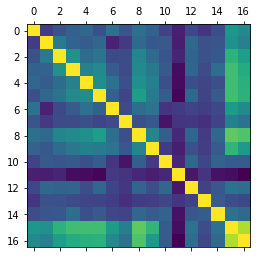

In [230]:
plt.matshow(dataset_downsampled.corr())

### Box Plot

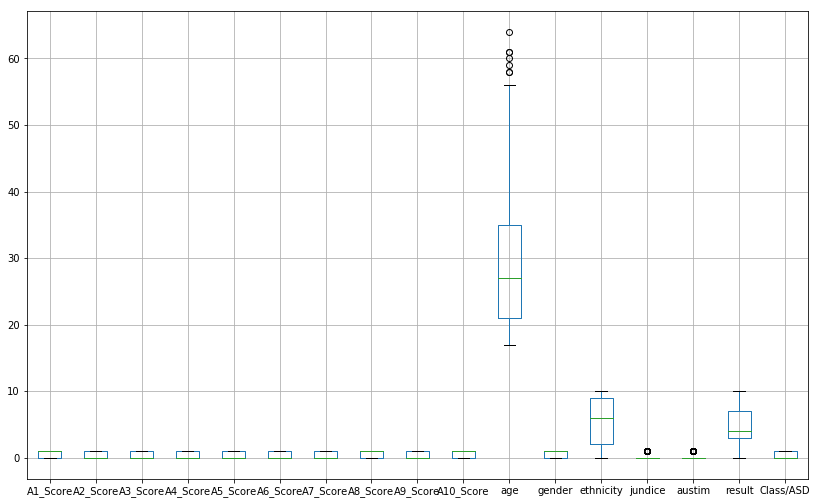

In [231]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 14
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
dataset.boxplot()

### Calculando as correlações entre os principais atributos do dataset não balanceado...

In [232]:
dataset['age'].corr(dataset['gender'])

-0.032815526183335914

In [233]:
dataset['gender'].corr(dataset['ethnicity'])

-0.07866649940122147

In [234]:
dataset['ethnicity'].corr(dataset['jundice'])

0.0886701099213223

In [235]:
dataset['jundice'].corr(dataset['austim'])

0.1577930738661408

In [236]:
dataset['austim'].corr(dataset['result'])

0.19203293304513375

In [237]:
dataset['result'].corr(dataset['Class/ASD'])

0.8214454241251392

### Calculando as correlações entre os principais atributos do dataset balanceado...

In [238]:
dataset_downsampled['age'].corr(dataset_downsampled['gender'])

-0.03766446394379984

In [239]:
dataset_downsampled['gender'].corr(dataset_downsampled['ethnicity'])

-0.09806627359942534

In [240]:
dataset_downsampled['ethnicity'].corr(dataset_downsampled['jundice'])

0.056679696193340325

In [241]:
dataset_downsampled['jundice'].corr(dataset_downsampled['austim'])

0.1676845735156486

In [242]:
dataset_downsampled['austim'].corr(dataset_downsampled['result'])

0.2615241629286854

In [243]:
dataset_downsampled['result'].corr(dataset_downsampled['Class/ASD'])

0.8594300921861192

### Plotando os histogramas dos atributos a serem usados futuramente... 

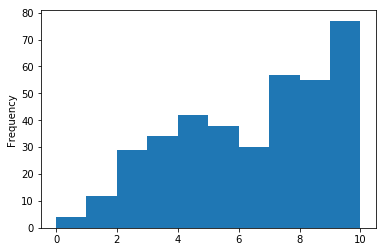

In [244]:
dataset_downsampled['result'].plot(kind='hist')

### Observação importante: as classificações estão balanceadas.

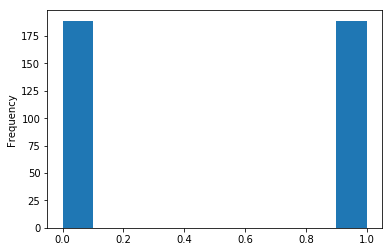

In [245]:
dataset_downsampled['Class/ASD'].plot(kind='hist')

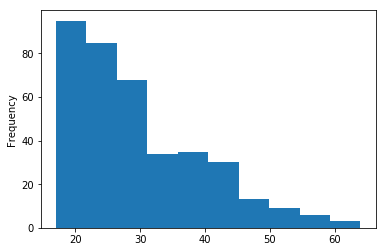

In [246]:
dataset_downsampled['age'].plot(kind='hist')

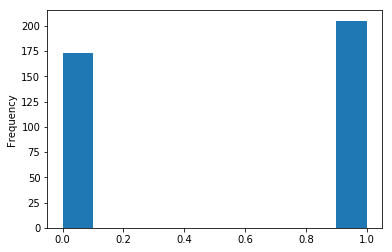

In [247]:
dataset_downsampled['gender'].plot(kind='hist')

### Alterando a escala dos dados para que nenhum deles seja menos relevante do que o outro na fase de treinamento do aprendizado de máquina.

In [248]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 2. K-Nearest Neighbors (K-NN)

No reconhecimento de padrões, o algoritmo k-vizinhos mais próximos (K-NN) é um método não paramétrico utilizado para classificação e regressão. Em ambos os casos, a entrada consiste nos exemplos de treinamento dos k vizinhos no espaço. A saída depende se o K-NN é usado para classificação ou regressão:

Na classificação K-NN, a saída é a indicação de qual classe aquele determinado objeto pertence. Um objeto é classificado por um voto majoritário dos seus vizinhos, com o objeto sendo associado à classe mais comum entre aqueles k-vizinhos mais próximos (k é um inteiro positivo, tipicamente pequeno). Se k = 1, então o objeto é simplesmente designado à classe daquele vizinho mais próximo.

Referência: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

### Realizando o fitting do K-NN para o set de treinamento

#### Por padrão da biblioteca, a quantidade de vizinhos é configurada para 5. A métrica padrão também é Minkowski. O p indica o parâmetro de qual distância deve ser computada. Escolhemos trabalhar com distância euclidiana nesse caso.

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

In [249]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Prevendo os resultados do set de testes

In [250]:
y_pred = classifier.predict(X_test)

### Matriz de Confusão

#### Com a matriz de confusão percebemos os Falsos Positivos (FP), Falsos Negativos (FN), Verdadeiros Positivos (VP), Verdadeiros Negativos (VN). Na linha 1 da matriz de confusão temos o VN e o FN. Na linha 2 temos o FP e o VP.

Referência: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [251]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39  3]
 [ 0 34]]


### Visualizando os resultados do set de treinamento

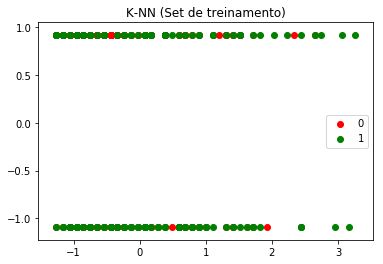

In [252]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set de treinamento)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

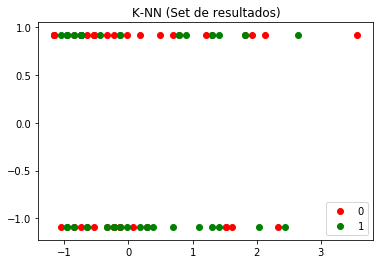

In [253]:
X_set, y_set = X_test, y_test

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set de resultados)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Acurácia

Pontuação de classificação de acurácia.

Em uma classificação multirotulada, essa função computa a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto de rótulos em y_true.

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [254]:
from sklearn.metrics import accuracy_score
ac_score = accuracy_score(y_test, y_pred)
print(ac_score)

0.9605263157894737


### Métrica F1

Computa a pontuação F1.

A pontuação F1 pode ser interpretada como uma média ponderada da precisão e recordação. A pontuação F1 atinge seu melhor valor em 1 e o pior em 0. A contribuição relativa da precisão e recordação são iguais à pontuação F1. A fórmula para a pontuação F1 é:

F1 = 2 * (precisão * recordação) / (precisão + recordação)

Nos casos de multiclasse e multirótulos, essa é a média da pontuação F1 de cada classe com pesos dependendo do parâmetro médio.

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [255]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test, y_pred)
print(f1score)

0.9577464788732395


### Bônus: realizando o fitting do K-NN para o set de treinamento

#### Utilizaremos o k = 302.

In [256]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 302, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=302, p=2,
           weights='uniform')

### Prevendo os resultados do set de testes

In [257]:
y_pred = classifier.predict(X_test)

### Matriz de Confusão

#### Com o resultado abaixo percebemos que foram classificados 0 como Verdadeiros Negativos (VN), porém 42 foram classificados como Falsos Negativos (FN). Por fim, 0 como FP e 34 como VP.

In [258]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0 42]
 [ 0 34]]


### Visualizando os resultados do set de treinamento

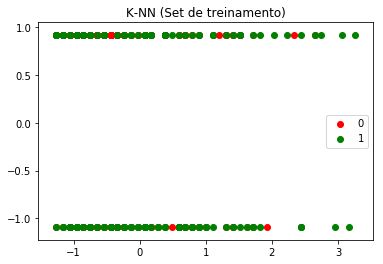

In [259]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set de treinamento)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

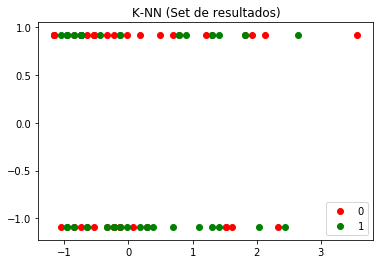

In [260]:
X_set, y_set = X_test, y_test

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Set de resultados)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Acurácia

In [261]:
from sklearn.metrics import accuracy_score
ac_score = accuracy_score(y_test, y_pred)
print(ac_score)

0.4473684210526316


### Métrica F1

In [262]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test, y_pred)
print(f1score)

0.6181818181818182


# 3. SVM

Em aprendizado de máquina, support vector machines (SVM) são modelos de aprendizado supervisionados com algoritmos de aprendizado associados que analisam o dado usado para a classificação e regressão. Dado um conjunto de exemplos de treinamento, cada um marcado como pertencente a uma ou outra categoria, um algoritmo de treinamento SVM constrói um modelo que atribui novos exemplos a uma categoria ou à outra, tornando ele um classificador binário linear não-probabilístico. Um modelo SVM é uma representação dos exemplos como pontos no espaço, mapeados a fim de que os exemplos das categorias separadas são divididos claramente por um espaço que é o maior possível.

Referência: https://en.wikipedia.org/wiki/Support_vector_machine

Referência: http://scikit-learn.org/stable/modules/svm.html

### Realizando o fitting do SVM para o conjunto de treinamento

O SVC foi utilizado pois trata-se de um problema com multirótulos, ou seja, mais de uma classe, o que de fato acontece, pois temos duas classes: doente e saudável.

O tipo do kernel escolhido foi o linear, ou seja, os objetos a serem preditos devem ser separados de forma linear entre dois rótulos ou duas classes.

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


In [263]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 123)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

### Prevendo os resultados do conjunto de testes

In [264]:
y_pred = classifier.predict(X_test)

### Construindo a matriz de confusão

In [265]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  0]
 [ 0 34]]


### Plotando os resultados do conjunto de treinamento

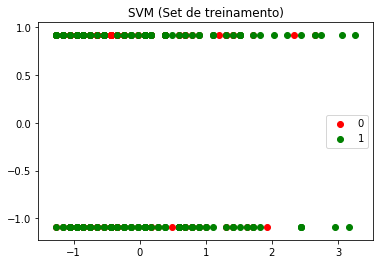

In [266]:
X_set, y_set = X_train, y_train

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Set de treinamento)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Plotando os resultados do conjunto de testes

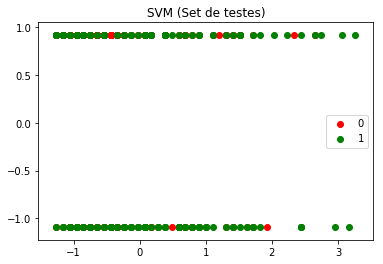

In [267]:
X_set, y_set = X_train, y_train

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Set de testes)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Acurácia

In [268]:
ac_score = accuracy_score(y_test, y_pred)
print(ac_score)

1.0


### Métrica F1

In [269]:
f1score = f1_score(y_test, y_pred)
print(f1score)

1.0


### Bônus: realizando o fitting do SVM para o conjunto de treinamento

#### Trocaremos o kernel para sigmoid, ou seja, sigmoidal. A ideia é que o algoritmo de aprendizado de máquina consiga ser capaz de separar de forma sigmoidal as nossas duas classes. Percebemos que se o problema já foi resolvido satisfatoriamente de forma linear, todos os outros kernels possuirão um resultado satisfatório.


In [220]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 123)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

### Prevendo os resultados do conjunto de testes

In [221]:
y_pred = classifier.predict(X_test)

### Construindo a matriz de confusão

In [222]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  1]
 [ 0 34]]


### Plotando os resultados do conjunto de treinamento

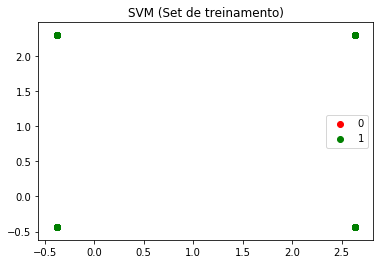

In [223]:
X_set, y_set = X_train, y_train

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Set de treinamento)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Plotando os resultados do conjunto de testes

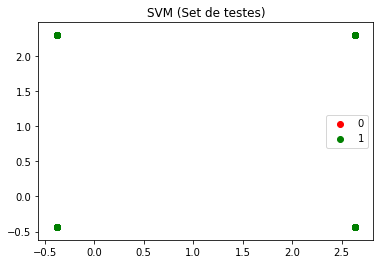

In [224]:
X_set, y_set = X_train, y_train

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Set de testes)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Acurácia

In [225]:
ac_score = accuracy_score(y_test, y_pred)
print(ac_score)

0.9868421052631579


### Métrica F1

In [226]:
f1score = f1_score(y_test, y_pred)
print(f1score)

0.9855072463768115
